In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [4]:
# Read data
data = pd.read_csv("../../Clean_Energy_Outlook/Data/data of states/AK.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][44:55]

# Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['HYTCP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Linear model: 256.966 * X4 + 208.49 * X0 + -56.43 * X5 + 42.509 * X1 + -40.443 * X9 + 0.0 * X2 + 0.0 * X3 + 0.0 * X6 + 0.0 * X7 + 0.0 * X8


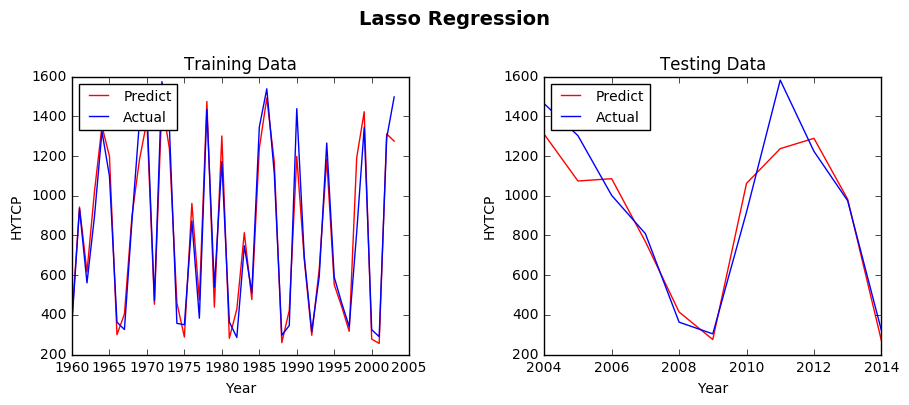

In [5]:
lasso = Lasso(alpha=2)
lasso.fit(X_train, y_train)

def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)
 
print("Linear model:", pretty_print_linear(lasso.coef_, sort=True))

# Plots
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Lasso Regression', fontsize=14, fontweight='bold')

# Plot for training data
fig.add_subplot(121)
plt.plot(year1, lasso.predict(X_train), color='red', label='Predict')
plt.plot(year1, y_train, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('HYTCP')

# Plot for test data
fig.add_subplot(122)
plt.plot(year2, lasso.predict(X_test), color='red', label='Predict')
plt.plot(year2, y_test, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('HYTCP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

In [6]:
train_error = mean_squared_error(y_train, lasso.predict(X_train))
print('Training MSE: %.3f' % train_error)
test_error = mean_squared_error(y_test, lasso.predict(X_test))
print('Test MSE: %.3f' % test_error)

Training MSE: 11097.808
Test MSE: 21391.210
